In [53]:
%matplotlib inline

# Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os 
import statistics
import scipy.stats as sts
# Import mpl to change the plot configurations using rcParams.
import matplotlib as mpl

import random 
import timeit
import requests
import time

#Notice the difference in import syntax for these modules. This eliminates the need to double type the name
#For example: datetime.datetime.xyz
from citipy import citipy
from datetime import datetime
from scipy.stats import linregress

# Import the API key.
from config import weather_api_key


In [54]:
#6.1.4 Generate Random Latitudes and Longitudes##########################################

# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)

#The zip helps with memory management. It creates an iterable object. After you iterate over it, the zip empties.
lat_lngs = zip(lats, lngs)
lat_lngs

#The zip object packs each pair of lats and lngs having the same index in their respective array into a tuple. 
#If there are 1,500 latitudes and longitudes, there will be 1,500 tuples of paired latitudes and longitudes, 
#where each latitude and longitude in a tuple can be accessed by the index of 0 and 1, respectively

In [7]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

#Now that we have our ordered pairs of latitudes and longitudes in a list, 
#we can iterate through the list of tuples and find the nearest city to those coordinates.

In [8]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

605

In [9]:
# 6.2.6 Get the City Weather Data ##################################################################################


In [10]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1


# Loop through all the cities in the list.
# ****check enumerate. Allows you to access the index of the "i".
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | saskylakh
Processing Record 2 of Set 1 | poyarkovo
Processing Record 3 of Set 1 | vanavara
Processing Record 4 of Set 1 | bathsheba
Processing Record 5 of Set 1 | aquiraz
Processing Record 6 of Set 1 | makakilo city
Processing Record 7 of Set 1 | waingapu
Processing Record 8 of Set 1 | plettenberg bay
Processing Record 9 of Set 1 | nijar
Processing Record 10 of Set 1 | upernavik
Processing Record 11 of Set 1 | khatanga
Processing Record 12 of Set 1 | castro
Processing Record 13 of Set 1 | butaritari
Processing Record 14 of Set 1 | saint anthony
Processing Record 15 of Set 1 | rikitea
Processing Record 16 of Set 1 | punta arenas
Processing Record 17 of Set 1 | yellowknife
Processing Record 18 of Set 1 | ushuaia
Processing Record 19 of Set 1 | aasiaat
Processing Record 20 of Set 1 | san patricio
Processing Record 21 of Set 1 | thompson
Processing Record 22 of Set 1 | saint-francois
Processing Recor

Processing Record 43 of Set 4 | tilichiki
Processing Record 44 of Set 4 | ordu
Processing Record 45 of Set 4 | abbeville
Processing Record 46 of Set 4 | bondo
Processing Record 47 of Set 4 | tasiilaq
Processing Record 48 of Set 4 | zanjan
Processing Record 49 of Set 4 | churapcha
Processing Record 50 of Set 4 | nola
Processing Record 1 of Set 5 | tocopilla
Processing Record 2 of Set 5 | karkaralinsk
City not found. Skipping...
Processing Record 3 of Set 5 | lexington
Processing Record 4 of Set 5 | imeni poliny osipenko
Processing Record 5 of Set 5 | teknaf
Processing Record 6 of Set 5 | tharrawaddy
City not found. Skipping...
Processing Record 7 of Set 5 | jiuquan
Processing Record 8 of Set 5 | barentsburg
City not found. Skipping...
Processing Record 9 of Set 5 | petrolina de goias
Processing Record 10 of Set 5 | palabuhanratu
City not found. Skipping...
Processing Record 11 of Set 5 | nelson bay
Processing Record 12 of Set 5 | saryozek
Processing Record 13 of Set 5 | hobart
Processin

Processing Record 31 of Set 8 | rincon
Processing Record 32 of Set 8 | solovetskiy
City not found. Skipping...
Processing Record 33 of Set 8 | sakaiminato
Processing Record 34 of Set 8 | zavetnoye
Processing Record 35 of Set 8 | yerbogachen
Processing Record 36 of Set 8 | sorvag
City not found. Skipping...
Processing Record 37 of Set 8 | paamiut
Processing Record 38 of Set 8 | sandwick
Processing Record 39 of Set 8 | barabai
Processing Record 40 of Set 8 | antofagasta
Processing Record 41 of Set 8 | aklavik
Processing Record 42 of Set 8 | tallahassee
Processing Record 43 of Set 8 | sept-iles
Processing Record 44 of Set 8 | vardo
Processing Record 45 of Set 8 | constitucion
Processing Record 46 of Set 8 | ponta delgada
Processing Record 47 of Set 8 | vila velha
Processing Record 48 of Set 8 | great falls
Processing Record 49 of Set 8 | mehamn
Processing Record 50 of Set 8 | port augusta
Processing Record 1 of Set 9 | pa sang
Processing Record 2 of Set 9 | coihaique
Processing Record 3 o

Processing Record 25 of Set 12 | anar darreh
City not found. Skipping...
Processing Record 26 of Set 12 | oranjestad
Processing Record 27 of Set 12 | lavumisa
Processing Record 28 of Set 12 | kadykchan
City not found. Skipping...
Processing Record 29 of Set 12 | mbarara
Processing Record 30 of Set 12 | dawei
Processing Record 31 of Set 12 | lapua
Processing Record 32 of Set 12 | nhulunbuy
Processing Record 33 of Set 12 | dingle
Processing Record 34 of Set 12 | kerki
City not found. Skipping...
Processing Record 35 of Set 12 | bardiyah
Processing Record 36 of Set 12 | tigzirt
Processing Record 37 of Set 12 | westerland
Processing Record 38 of Set 12 | goure
Processing Record 39 of Set 12 | viedma
Processing Record 40 of Set 12 | meadow lake
Processing Record 41 of Set 12 | poum
Processing Record 42 of Set 12 | havre-saint-pierre
Processing Record 43 of Set 12 | tulsipur
Processing Record 44 of Set 12 | ashland
Processing Record 45 of Set 12 | saint combs
City not found. Skipping...
Proc

In [12]:
len(city_data)

559

In [13]:
#This is a list of dictionaries
type(city_data)

list

In [14]:
#6.2.7 Create a DataFrame of City Weather Data ########################################################################

In [15]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Saskylakh,71.92,114.08,81.21,31,30,12.44,RU,2020-06-23 22:47:47
1,Poyarkovo,49.60,128.68,53.17,95,100,18.10,RU,2020-06-23 22:47:47
2,Vanavara,60.34,102.28,65.39,68,53,3.56,RU,2020-06-23 22:47:47
3,Bathsheba,13.22,-59.52,82.40,78,20,17.22,BB,2020-06-23 22:47:47
4,Aquiraz,-3.90,-38.39,80.60,74,91,9.17,BR,2020-06-23 22:47:47
5,Makakilo City,21.35,-158.09,84.20,61,75,12.75,US,2020-06-23 22:47:47
6,Waingapu,-9.66,120.26,74.37,78,27,9.73,ID,2020-06-23 22:45:06
7,Plettenberg Bay,-34.05,23.37,61.90,51,10,3.40,ZA,2020-06-23 22:47:47
8,Nijar,36.97,-2.21,77.00,53,0,12.75,ES,2020-06-23 22:47:47
9,Upernavik,72.79,-56.15,34.81,89,0,10.63,GL,2020-06-23 22:47:39


In [16]:
#assign a variable to an array of the columns in the order we want them to appear:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [17]:
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Saskylakh,RU,2020-06-23 22:47:47,71.92,114.08,81.21,31,30,12.44
1,Poyarkovo,RU,2020-06-23 22:47:47,49.60,128.68,53.17,95,100,18.10
2,Vanavara,RU,2020-06-23 22:47:47,60.34,102.28,65.39,68,53,3.56
3,Bathsheba,BB,2020-06-23 22:47:47,13.22,-59.52,82.40,78,20,17.22
4,Aquiraz,BR,2020-06-23 22:47:47,-3.90,-38.39,80.60,74,91,9.17
...,...,...,...,...,...,...,...,...,...
554,Rocha,UY,2020-06-23 22:46:27,-34.48,-54.33,63.61,97,99,6.06
555,Sotouboua,TG,2020-06-23 22:48:11,8.57,0.98,72.91,90,70,1.79
556,Pitimbu,BR,2020-06-23 22:48:11,-7.47,-34.81,75.20,94,40,4.70
557,Rock Springs,US,2020-06-23 22:44:00,41.59,-109.20,78.80,22,75,4.70


In [18]:
# Create the output file (CSV)
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV
city_data_df.to_csv(output_data_file, index_label="City_ID")

#The last line in the code block will export the DataFrame to a CSV file, with the INDEX label (or column A) header as “City_ID.” 
#If we ever need to export the CSV file to a DataFrame, that header will be present in the DataFrame.

In [19]:
# 6.3.1 Plot Latitude vs. Temperature - Visualizations for STEM students ###################################################

In [20]:
# Extract relevant fields from the DataFrame for plotting
#These are all series
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [21]:
type(lats)

pandas.core.series.Series

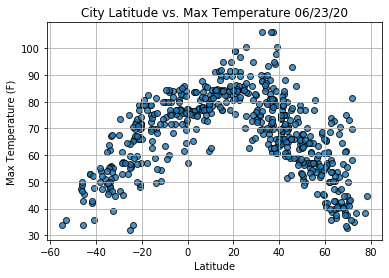

In [22]:
# Build the scatter plot for latitude vs. MAX TEMPERATURE.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

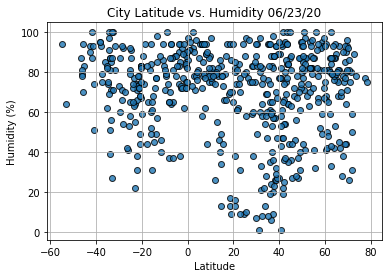

In [23]:
# Build the scatter plots for latitude vs. HUMIDITY.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

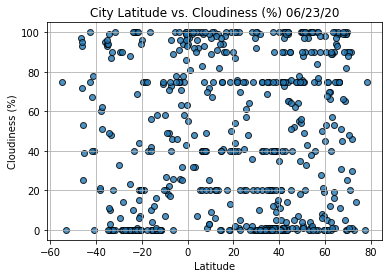

In [24]:
# Build the scatter plots for latitude vs. CLOUDINESS.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

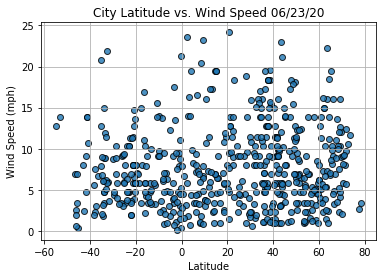

In [25]:
# Build the scatter plots for latitude vs. WIND SPEED.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [26]:
# 6.4.2 Find the Correlation Between Latitude and Maximum Temperature - uses Linear Regression FUNCTION ######################

In [27]:
# Create a FUNTCTION to create perform linear regression on the weather data **************************************
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [28]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

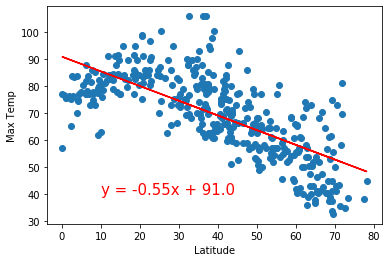

In [29]:
# Linear regression on the Northern Hemisphere - calls the function *****
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40))

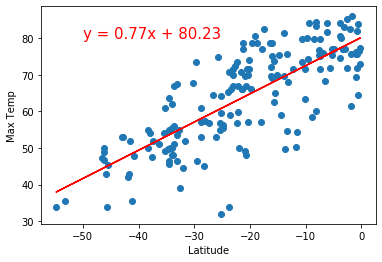

In [45]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,80))

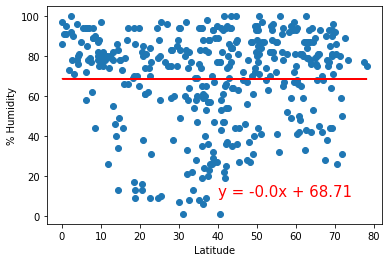

In [31]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

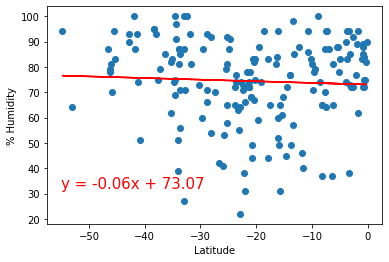

In [44]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-55,32))

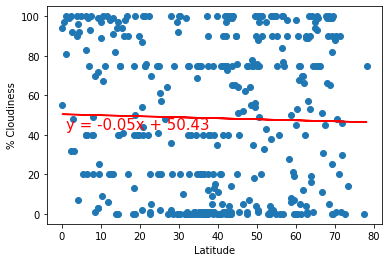

In [40]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(1,43))

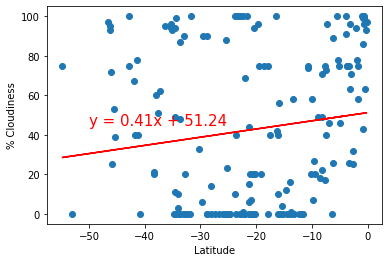

In [39]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,45))

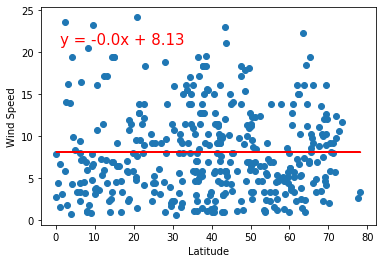

In [48]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(1,21))

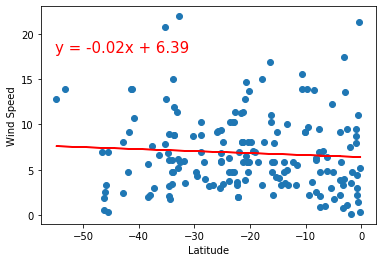

In [49]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-55,18))